# 1- Perkenalan / Introduction

```
====================================================================

Nama        : Rio Ardiarta Makhiyyuddin

Batch       : SBY_03

Data        : [Data] (rideshare_kaggle.csv)


Objective   : 

=====================================================================

# 2- Import Libraries

In [117]:
# for basic use
import pandas as pd
import numpy as np
import pickle

# for visualize
import matplotlib.pyplot as plt
import seaborn as sns

# import model

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import kendalltau, pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import library untuk mengabaikan peringatan
import warnings
warnings.filterwarnings("ignore")

- Import for basic use
- import visualize untuk digunakan pada pembuatan visualisasi
- import model
- import warning untuk mengabaikan peringatan

# 3- Data Loading

> Data Loading adalah proses menyalin dan memuat data atau kumpulan data dari file sumber, folder atau aplikasi ke database atau aplikasi serupa. Pada project ini, data loading dilakukan dengan cara import file csv.

In [118]:
# Load data file csv
df = pd.read_csv ('rideshare_kaggle.csv')

In [119]:
# Cek 5 teratas
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [120]:
# Cek 5 terbawah
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [121]:
# Cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Terdapat missing values pada kolom price dari total 693071 menjadi 637976, oleh maka dari itu akan kita cek terlebih dahulu data yang memiliki missing values. Jika menurut data yang ditampilkan tidak memiliki nilai yang sesuai maka akan dilakukan drop.

In [122]:
# Cek jumlah data
df.shape

(693071, 57)

In [123]:
# Deskripsi Statistik
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


## 3.1- Cleaning Data

**Hapus kolom yang tidak digunakan :**

- `Id :` hanya digunakan untuk catatan

- `timestamp :` kita menggunakan kolom hour, day, month karena fungsinya sama

- `datetime :` kita cek dahulu untuk melihat datanya, jika ternyata tidak ada pengaruhnya pada kolom lain, maka akan kita drop 

- `product_id :` untuk mempertimbangkan nama product yang akan digunakan, maka kita hapus

- `long_summary :` kolom ini berisikan catatan dari kolom short_summary

### 3.1.1- Cek column dan drop column

> Cek missing value

In [124]:
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [125]:
# Menghitung nilai null pada kolom price
null_price = df['price'].isnull().sum()

# Menghitung total data pada kolom price
total_price = len(df['price'])

# Menghitung persentase missing value
perc_missing_price = (null_price / total_price) * 100

print('total nilai null :', null_price)
print('total data :', total_price)
print(f"Persentase missing value pada kolom price: {perc_missing_price:.2f}%")

total nilai null : 55095
total data : 693071
Persentase missing value pada kolom price: 7.95%


> Cek data duplikat

In [126]:
# cek jumlah data, null, dan dtype
df.duplicated().sum()

0

> Ubah tipe data datetime

In [127]:
df['datetime'] = pd.to_datetime(df['datetime'])

> Cek kolom duplikat

In [128]:
df[['visibility', 'visibility.1']].head()

,visibility,visibility.1
0,10.000,10.000
1,4.786,4.786
2,10.000,10.000
3,10.000,10.000
4,10.000,10.000


In [129]:
df[['visibility', 'visibility.1']].duplicated().sum()

692844

In [130]:
df = df.drop(['visibility.1'], axis=1)

In [131]:
# Cek unique value pada semua kolom
for col in df:
    print(f'{col} : {df[col].unique()}')
    print()

id : ['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '64d451d0-639f-47a4-9b7c-6fd92fbd264f'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']

timestamp : [1.54495261e+09 1.54328402e+09 1.54336682e+09 ... 1.54377528e+09
 1.54507051e+09 1.54473900e+09]

hour : [ 9  2  1  4  3 18  5 19  6 10 16 22 23  0 14 11  7 20 13  8 12 21 17 15]

day : [16 27 28 30 29 17 26  2  3 13 14  1 18 15  4 10  9]

month : [12 11]

datetime : <DatetimeArray>
['2018-12-16 09:30:07', '2018-11-27 02:00:23', '2018-11-28 01:00:22',
 '2018-11-30 04:53:02', '2018-11-29 03:49:20', '2018-12-17 18:25:12',
 '2018-11-26 05:03:00', '2018-12-02 19:53:04', '2018-12-03 06:28:02',
 '2018-11-27 10:45:22',
 ...
 '2018-12-17 20:20:04', '2018-12-15 19:05:08', '2018-12-18 18:40:03',
 '2018-12-18 08:40:06', '2018-12-02 13:47:59', '2018-11-30 23:08:02',
 '2018-12-14 15:55:05', '2018-12-17 07:15:07', '2018-11-30 05:23:02',
 '20

Berdasarkan pengecekan diperoleh informasi bahwa :

1. Terdapat nilai null sebesar 55095 dari total 693071 yaitu 7.95% dari total data.
2. Dataset secara keseluruhan tidak memiliki data yang duplikat.
3. Mengubah tipe data datetime, dari object menjadi datetime64[ns].
4. Menghapus kolom duplikat (visibility1).

### 3.1.2- Cleaning Data

In [132]:
#Membuat variabel baru dengan mengcopy dataframe df karena akan dibuat 2 jenis data cleaning
df_clean = df.copy()
df_clean.shape

(693071, 56)

In [133]:
# cek missing value
df_clean.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Ternyata ada 55095 missing value pada kolom price.

Setelah diproses dengan median, bahwa missing value pada kolom price sudah tidak ada.

In [134]:
# Menghapus missing  value dengan dropna
df_clean.dropna(axis=0,inplace=True)
df_clean.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Selama proses dropna, bahwa missing value pada kolom price sudah tidak ada.


In [135]:
df_clean['timezone'].unique()

array(['America/New_York'], dtype=object)

In [136]:
df_clean['timestamp'].unique()

array([1.54495261e+09, 1.54328402e+09, 1.54336682e+09, ...,
       1.54473751e+09, 1.54502280e+09, 1.54372728e+09])

In [137]:
df_clean['datetime'].unique()

<DatetimeArray>
['2018-12-16 09:30:07', '2018-11-27 02:00:23', '2018-11-28 01:00:22',
 '2018-11-30 04:53:02', '2018-11-29 03:49:20', '2018-12-17 18:25:12',
 '2018-11-26 05:03:00', '2018-12-02 19:53:04', '2018-12-03 06:28:02',
 '2018-11-27 10:45:22',
 ...
 '2018-12-18 01:00:04', '2018-12-18 06:00:06', '2018-12-14 22:20:09',
 '2018-12-03 16:02:59', '2018-12-15 11:30:07', '2018-12-16 11:45:07',
 '2018-12-13 21:45:07', '2018-12-17 05:00:04', '2018-12-03 16:48:07',
 '2018-12-02 05:07:57']
Length: 31350, dtype: datetime64[ns]

In [138]:
df_clean['long_summary'].unique()

array([' Rain throughout the day. ',
       ' Rain until morning, starting again in the evening. ',
       ' Light rain in the morning. ',
       ' Partly cloudy throughout the day. ',
       ' Mostly cloudy throughout the day. ',
       ' Light rain in the morning and overnight. ',
       ' Light rain until evening. ', ' Foggy in the morning. ',
       ' Overcast throughout the day. ',
       ' Possible drizzle in the morning. ',
       ' Rain in the morning and afternoon. '], dtype=object)

In [139]:
df_clean['product_id'].unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2'], dtype=object)

In [140]:
df_clean['icon'].unique()

array([' partly-cloudy-night ', ' rain ', ' clear-night ', ' cloudy ',
       ' fog ', ' clear-day ', ' partly-cloudy-day '], dtype=object)

In [141]:
df_clean = df_clean.drop(['timezone', 'datetime', 'timestamp', 'id', 'long_summary', 'icon','product_id', 'longitude', 'latitude'], axis=1)

> Drop kolom yang memiliki kemiripan dengan kolom lain dan tidak mempunyai korelasi dengan target

## 3.2- Conclusion

Dari informasi diatas dapat disimpulkan:

- Dapat disimpulkan bahwa terdapat 693071 baris dan 56 kolom dengan missing value sebesar 7.95%

- Kolom yang memiliki kemiripan dengan kolom lain akan didrop, dan kolom yang tidak memiliki korelasi dengan target akan kita drop

- Pada kolom visibility dan visibility.1 merupakan data duplikat, maka akan didrop pada kolom visibility.1

- Setelah melakukan copy pada dataframe untuk cleaning, terdapat missing value pada price sebesar 55905. Maka akan dilakukan drop missing value pada kolom price.

# 4- Exploratory Data Anlysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya

## 4.1- Numerikal

### 4.1.1- Temperature

In [142]:
# Pengelompokan terkait Iklim pada setiap kolom
temp_col = ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax',
            'apparentTemperatureMin','apparentTemperatureMax', 'apparentTemperatureHighTime','price']
df_temp = df_clean[temp_col].corr()

<Axes: >

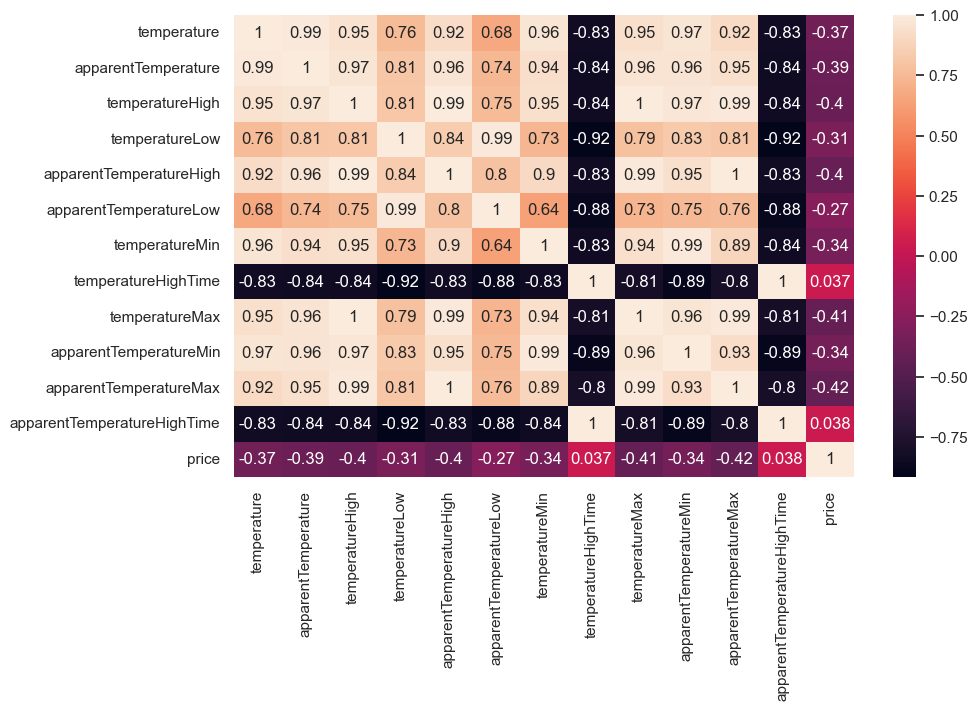

In [143]:
plt.figure(figsize=(10,6))
sns.heatmap(df_temp.corr(),annot=True)

In [144]:
df_temp['price'].sort_values()

apparentTemperatureMin        -0.000580
temperatureMax                -0.000550
temperatureHigh               -0.000516
temperatureMin                -0.000428
apparentTemperatureMax        -0.000290
apparentTemperatureHigh       -0.000261
apparentTemperature           -0.000193
temperature                   -0.000084
temperatureLow                 0.000182
apparentTemperatureHighTime    0.000741
temperatureHighTime            0.000759
apparentTemperatureLow         0.000831
price                          1.000000
Name: price, dtype: float64

In [145]:
df_clean = df_clean.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
              'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax',
              'apparentTemperatureMin','apparentTemperatureMax', 'apparentTemperatureHighTime','apparentTemperatureLowTime',
              'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
              'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)

> Dapat dilihat dari semua fitur terkait temperature memiliki korelasi lemah dengan target price, maka menghapus semua fitur temperatur tidak akan berdampak apapun.

### 4.1.2- Iklim

In [146]:
# Pengelompokan terkait Iklim pada setiap kolom
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase','precipIntensityMax','price']
df_clim = df_clean[climate_column].corr()

<Axes: >

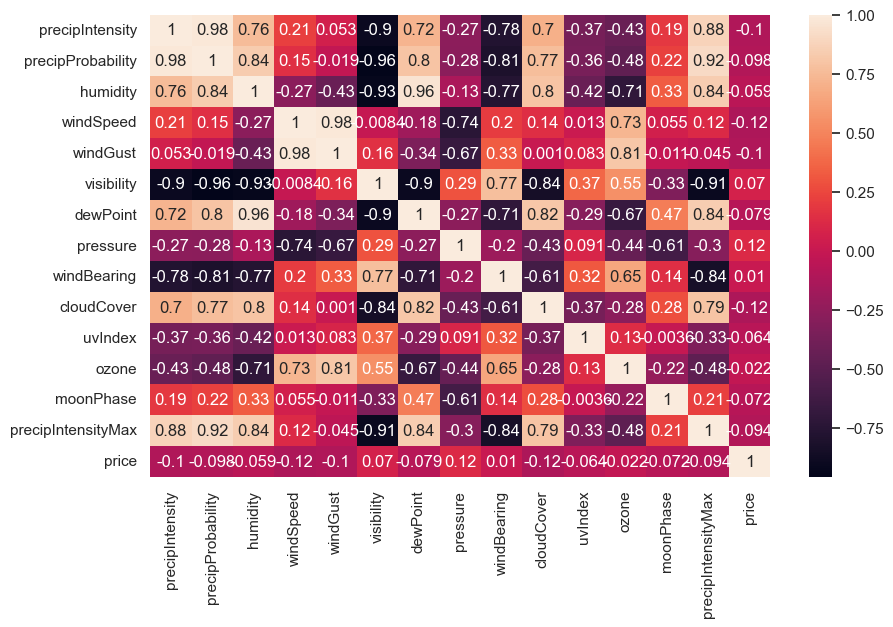

In [147]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_clim.corr(),annot=True)

In [148]:
df_clim['price'].sort_values()

moonPhase            -0.001602
windBearing          -0.001382
humidity             -0.001238
dewPoint             -0.000615
uvIndex              -0.000424
precipProbability    -0.000243
precipIntensity       0.000166
ozone                 0.000460
pressure              0.000866
cloudCover            0.000883
windSpeed             0.000990
precipIntensityMax    0.001114
windGust              0.001218
visibility            0.001497
price                 1.000000
Name: price, dtype: float64

In [149]:
df_clean = df_clean.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)

> Dapat dilihat dari semua fitur terkait iklim memiliki korelasi lemah dengan target price, maka menghapus semua fitur temperatur tidak akan berdampak apapun.

In [150]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              637976 non-null  int64  
 1   day               637976 non-null  int64  
 2   month             637976 non-null  int64  
 3   source            637976 non-null  object 
 4   destination       637976 non-null  object 
 5   cab_type          637976 non-null  object 
 6   name              637976 non-null  object 
 7   price             637976 non-null  float64
 8   distance          637976 non-null  float64
 9   surge_multiplier  637976 non-null  float64
 10  short_summary     637976 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 58.4+ MB


## 4.2- Categorical

### 4.2.1- Ordinal

#### 4.2.1.1- Perbandingan pada kolom surge_multiplier yang memiliki rata-rata price lebih tinggi

<Axes: xlabel='surge_multiplier', ylabel='price'>

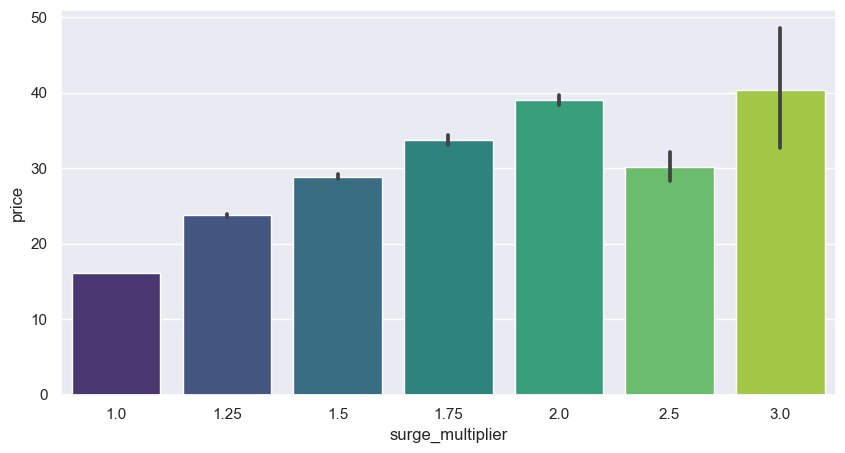

In [151]:
# Tampilkan barplot
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='surge_multiplier', y='price', palette= 'viridis', data=df_clean)

In [152]:
# Menampilkan nilai mean harga dari tipe Lyft dan Uber
df_clean.groupby('surge_multiplier')['price'].mean()

surge_multiplier
1.00    16.161259
1.25    23.768471
1.50    28.894472
1.75    33.673760
2.00    39.048459
2.50    30.207792
3.00    40.333333
Name: price, dtype: float64

> Ternyata rata-rata dengan nilai tertinggi pada kolom surge_multiplier 3.0 sebesar 40.33 dan untuk nilai terendah pada nilai 1.0 sebesar 16.16

### 4.2.2- Nominal

#### 4.2.2.1- Korelasi antara name, cab_type dan price

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


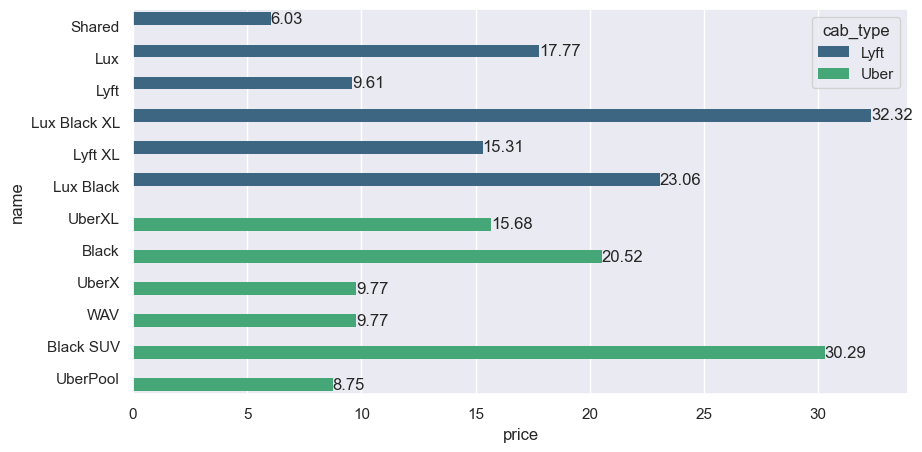

In [153]:
# Tampilkan barplot
sns.set(rc={'figure.figsize':(10,5)})

bars = sns.barplot(y='name', x='price', data=df_clean, hue='cab_type', palette= 'viridis', ci=None, edgecolor='None')

# Buat nilai pada ujung bar
for p in bars.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='left', va='center')

plt.show()


**Kesimpulan**

Berdasarkan data diatas, bahwan jenis mobil pada Uber dan Lyft mempengaruhi. Selain itu informasi yang dikita dapat adalah :

1. Lyft 
    - Tarif tertinggi saat menggunakan jenis mobil Lux Black Xl sebesar 32.32
    - Tarif terendah saat menggunakan jenis mobil Shared sebesar 6.03
2. Uber
    - Tarif tertinggi saat menggunakan jenis mobil Black SUV sebesar 30.28
    - Tarif terendah saat menggunakan jenis mobil UberPool sebesar 8.75

#### 4.2.2.2- Korelasi antara distance, cab_type dan price

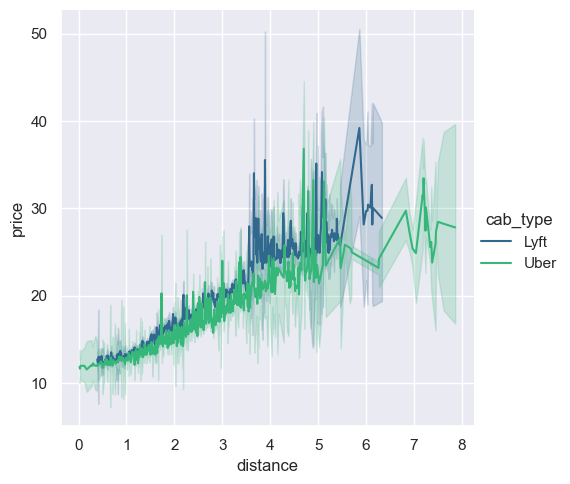

In [154]:
sns.set(rc={'figure.figsize':(10,5)})
sns.relplot(kind='line', x='distance', y='price', data=df_clean, hue='cab_type', palette = 'viridis')

**Kesimpulan**

Berdasarkan grafik diatas, bahwa semakin jauh jarak yang ditempuh oleh Uber dan Lyft maka semakin besar tarifnya. Perbandingan tarif yang tinggi antara Lyft dan Uber biarpun perjalanan yang ditempuh tidak terlalu besar. Artinya ada korelasi antara distance dan price.

#### 4.2.2.3- Korelasi antara month, hour, cab_type dan price

In [155]:
# Membuat grouping baru dengan ketentuan berikut
jam = df_clean[(df_clean['month'] < 13)].groupby(['cab_type','hour'])['price'].sum().sort_values(ascending=False)
df_jam = pd.DataFrame(jam)
df_jam

price
cab_type hour           
Lyft     0     255765.50
         23    242338.50
Uber     23    242051.00
Lyft     17    240697.50
Uber     0     239356.00
Lyft     12    236207.50
         13    234330.70
         11    234014.50
         15    232217.00
Uber     14    231967.00
Lyft     16    231757.85
         22    231084.00
         18    231052.00
         14    231032.50
Uber     18    230726.00
Lyft     10    230644.00
Uber     16    230171.50
         10    230031.50
         11    228729.50
         13    228681.50
         15    228296.50
         12    225667.50
         17    225572.00
Lyft     9     223492.50
         1     219313.50
Uber     2     218564.50
         22    218534.00
Lyft     2     217391.85
         4     217118.50
Uber     9     216947.50
Lyft     19    216630.93
         21    216323.85
Uber     4     216016.00
         1     215164.00
Lyft     3     212115.50
Uber     3     210143.50
         6     209147.50
         21    207900.00
Lyft     6     206264.00
Uber     20    204957.00
         19    203966.50
Lyft     20    203715.50
         5     193347.30
         7     190891.00
Uber     7     187262.00
         5     186926.00
Lyft     8     186212.00
Uber     8     184656.50

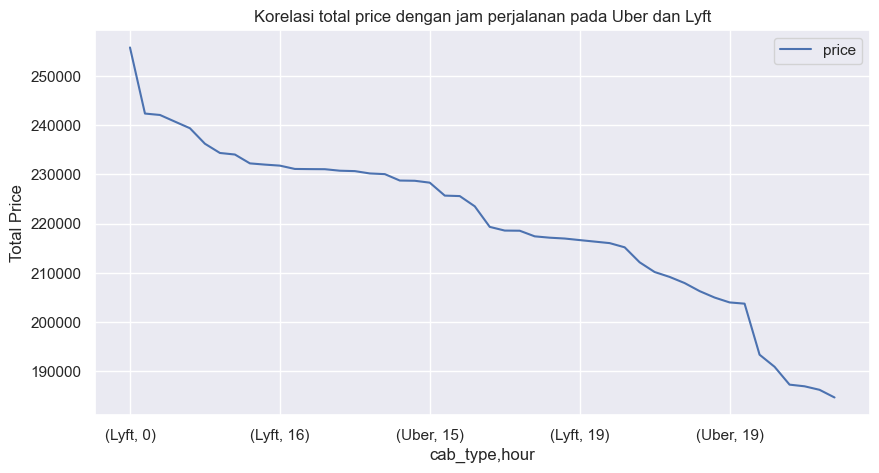

In [156]:
# Visualisasi
df_jam.plot()
plt.rcParams['figure.figsize'] = [12,10] # Mengubah ukuran canvas plot line
plt.ylabel('Total Price') # Mengatur label y
plt.title('Korelasi total price dengan jam perjalanan pada Uber dan Lyft') # Judul plot line
plt.show() # Menampilkan plot

Berdasarkan visualisasi, diperoleh bahwa:
1. Lyft
    - Total price paling tinggi berada pada jam 0, yaitu sebesar 255765.50
    - Total price paling rendah berada pada jam 8, yaitu sebesar 186212.00
2. Uber 
    - Total price paling tinggi berada pada jam 0, yaitu sebesar 242051.00
    - Total price paling rendah berada pada jam 8, yaitu sebesar 184656.50

#### 4.2.2.4- Korelasi antara day, surge_multiplier dan price

In [157]:
# Buat data korelasi day, surge_multiplier dan price
day_price = df_clean.pivot_table(index='day', 
                                     columns='surge_multiplier', 
                                     values='price', 
                                     aggfunc=np.mean, 
                                     fill_value=0)
# Buat rata-rata
day_price['mean'] = day_price.mean(axis=1, numeric_only=True)
day_price.sort_values('mean', ascending=False, inplace=True)
day_price.reset_index(drop=False)
day_price

surge_multiplier,1.0,1.25,1.5,1.75,2.0,2.5,3.0,mean
day,,,,,,,,
28,16.121999,23.994898,29.648897,33.367698,38.924370,32.342105,41.25,30.807138
14,16.193297,23.445007,28.481050,33.057554,39.933099,35.450000,38.50,30.722858
27,16.199827,23.871151,28.283835,34.846906,38.317623,28.361111,43.70,30.511493
1,16.169266,24.167738,28.281346,34.433544,41.934307,33.100000,34.25,30.333743
17,16.094579,23.801128,28.883544,35.312925,38.478571,28.884615,38.00,29.922195
16,16.203749,24.269851,28.964789,32.140152,36.529586,30.090909,38.00,29.457005
4,16.274700,22.775701,29.631579,37.010638,39.404762,33.666667,0.00,25.537721
13,16.220393,23.720968,28.815254,32.132867,38.412621,38.687500,0.00,25.427086
2,16.190633,22.997024,27.833935,33.329032,41.953125,33.666667,0.00,25.138631


In [158]:
# Cek 5 teratas
df_top5 = day_price.head()
top5_day = df_top5.drop(['mean'],axis=1)
top5_day

surge_multiplier,1.0,1.25,1.5,1.75,2.0,2.5,3.0
day,,,,,,,
28,16.121999,23.994898,29.648897,33.367698,38.924370,32.342105,41.25
14,16.193297,23.445007,28.481050,33.057554,39.933099,35.450000,38.50
27,16.199827,23.871151,28.283835,34.846906,38.317623,28.361111,43.70
1,16.169266,24.167738,28.281346,34.433544,41.934307,33.100000,34.25
17,16.094579,23.801128,28.883544,35.312925,38.478571,28.884615,38.00


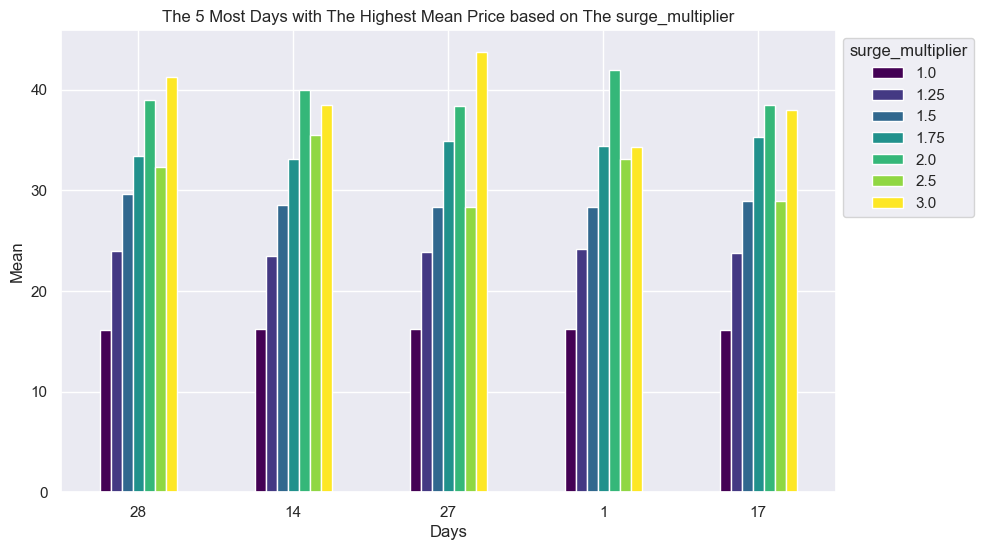

In [159]:
top5_day.plot(kind='bar', figsize=(10,6), colormap='viridis')

plt.title('The 5 Most Days with The Highest Mean Price based on The surge_multiplier')
plt.legend(bbox_to_anchor=(1,1), title='surge_multiplier')
plt.ylabel('Mean')
plt.xlabel('Days')
plt.xticks(rotation=0) 

plt.show()

**Kesimpulan**

- Rata-rata dari 5 hari dengan harga tertinggi berdasarakan surge_multiplier adalah di tanggal 28, 14, 27, 1 dan 17
- Rata-rata tarif tertinggi pada tanggal 28 dengan nilai kelipatan 3.0 sebesar 41.25 dan untuk tanggal 27 dengan nilai kelipatan 3.0 sebesar 43.70.


#### 4.2.2.5- Korelasi antara short_summary, cab_type, surge_multiplier dan price

In [160]:
# Buat korelasi antara values price dengan
# surge_multiplier dan kolom cab_type, short_summary
cuaca = df_clean.pivot_table(values='price',
                       index=['surge_multiplier'],
                       columns=['cab_type', 'short_summary'],
                       aggfunc=np.mean, 
                       fill_value=0)
cuaca.loc['mean'] = cuaca.mean()
cuaca = cuaca.T
cuaca = cuaca.reset_index(drop=False)

cuaca.sort_values('mean', ascending=False, inplace=True)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


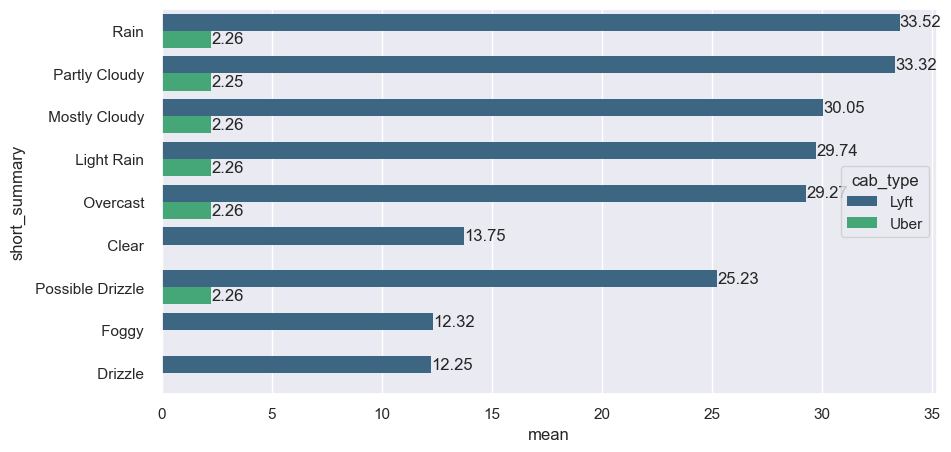

In [161]:
# Tampilkan barplot untuk mean short_summary
sns.set(rc={'figure.figsize':(10,5)})

# Buat barplot
bars = sns.barplot(x='mean', y='short_summary', hue= df_clean.cab_type, data=cuaca, palette='viridis', ci=None, edgecolor='None')

# Buat nilai pada ujung bar
for p in bars.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='left', va='center')

plt.show()

In [162]:
# Menampilkan rata-rata harga berdasarkan cuaca dan tipe taksi beserta surge_multiplier
cuaca

surge_multiplier,cab_type,short_summary,1.0,1.25,1.5,1.75,2.0,2.5,3.0,mean
8,Lyft,Rain,16.581970,23.615183,27.435897,36.976190,39.547619,25.500000,65.000000,33.522409
6,Lyft,Partly Cloudy,16.622169,24.095661,28.335751,33.038540,39.012262,29.666667,62.500000,33.324436
4,Lyft,Mostly Cloudy,16.593640,23.724283,29.009285,33.342241,39.313910,30.583333,37.750000,30.045242
3,Lyft,Light Rain,16.589515,23.796782,28.779948,32.702247,40.134831,33.361111,32.833333,29.742538
5,Lyft,Overcast,16.574693,23.750371,29.377551,34.279861,38.325532,26.912500,35.666667,29.269596
0,Lyft,Clear,16.519477,23.563738,28.963102,33.220085,40.725490,33.750000,0.000000,25.248842
7,Lyft,Possible Drizzle,16.539725,23.008361,26.988372,35.623188,36.697917,37.750000,0.000000,25.229652
2,Lyft,Foggy,16.682484,24.005650,30.913333,33.087500,29.595238,22.500000,0.000000,22.397744
1,Lyft,Drizzle,16.689300,24.076190,28.436170,31.840909,36.684211,18.000000,0.000000,22.246683
13,Uber,Mostly Cloudy,15.842580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.263226


**Kesimpulan**

Berdasarkan data dan visualisasi diatas, maka dapat disimpulkan bahwa :

- Cuaca dapat mempengaruhi tarif menjadi lebih mahal.
- Rata-rata pesanan dengan harga tertinggi berdasarkan cuaca dengan surge_multiplier pada saat cuaca Rain untuk tipe Lyft dengan nilai rata-rata 33.5.
- Untuk surge_multiplier yang paling tinggi pada saat cuaca Rain dengan kelipatan 3.0 dengan harga tertinggi 65.
- Rata-rata pesanan dengan harga terendah berdasarkan cuaca dengan surge_multiplier pada saat cuaca Foggy untuk tipe Uber dengan nilai rata-rata 2.2
- Dapat diartikan bahwa pesanan saat terjadi kelipatan harga tertinggi dengan tipe Lyft dibandingkan dengan Uber.

#### 4.2.2.6- Korelasi antara source, distance, name dan price

In [163]:
# Buat korelasi dengan values price yang ber-index name
# antara source dan distance
location_price = df_clean.pivot_table(values='price',
                       index=['name'],
                       columns=['source','destination'],
                       aggfunc=np.mean,
                       fill_value=0)
# Buat rata-rata
location_price.loc['mean'] = location_price.mean()
location_price = location_price.T
location_price = location_price.reset_index(drop=False)
location_price.sort_values('mean', ascending=False, inplace=True)

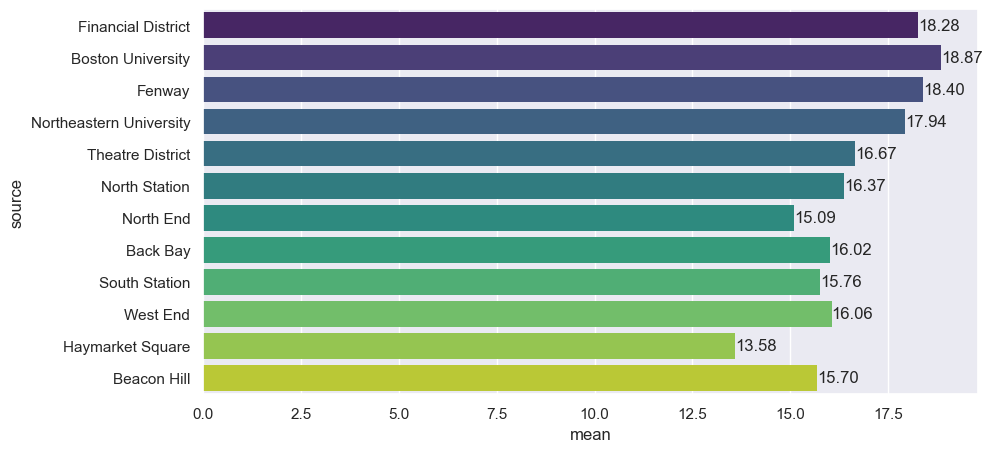

In [164]:
# buat figure
sns.set(rc={'figure.figsize': (10, 5)})

# Buat barplot
bars = sns.barplot(x='mean', y='source', data=location_price, palette='viridis', ci=None, edgecolor='None')

# Buat nilai pada ujung bar
for p in bars.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='left', va='center')

plt.show()


In [165]:
# Menampilkan rata-rata harga tertinggi berdasarkan source & destination
location_price.head(1)

name,source,destination,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV,mean
24,Financial District,Boston University,34.228923,43.572633,28.366481,37.477747,46.765647,14.248957,24.299722,9.324757,13.40013,14.824903,25.151751,14.824903,25.540546


In [166]:
# Menampilkan rata-rata harga terendah berdasarkan source & destination
location_price.tail(1)

name,source,destination,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV,mean
33,Haymarket Square,North Station,15.613158,26.877632,10.797636,16.604312,26.926287,7.018081,9.166898,4.06815,6.789474,7.171711,9.817105,7.171711,12.335179


**Kesimpulan**

- Perjalanan dengan rata-rata harga termahal dari Financial District ke Boston University sebesar 25.5. Untuk harga termahal dari jenis mobil Lux Black XL dari tipe Lyft dengan harga 46.76 dan harga terendah dengan jenis mobil Shared dengan harga 9.32.
- Perjalanan dengan rata-rata harga termurah dari Haymarket Square ke North Station sebesar 12.33. Untuk harga termahal dari jenis mobil Lux Black XL dari tipe Lyft dengan harga 26.92 dan harga terendah dengan jenis mobil Shared dengan harga 4.07

# 5- Feature Engineering

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-validation-test, transformasi data(normalisasi, encoding, dll), dan proses-proses lain yang dibutuhkan

## 5.1- Split Features (X) dan target (y)

In [167]:
df_clean1 = df_clean.copy()

In [180]:
# Split between Feature (X) and Target (y)
f = ['hour', 'day', 'distance', 'surge_multiplier', 'name', 'short_summary']
X = df_clean1[f].values
y = df_clean1['price'].values  # The TARGET column is 'price'

## 5.2- Split Train and Test set

In [181]:
# Split Train-set & Test-set for Feature (X) & Target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y,           # Split from Feature & Target
                                                    test_size=0.2,  # Proportional of Test-set would be 20%
                                                    random_state=10)# Random state 17

# Show shape of Feature (X) in Train-set & Test-set
print('Train size: ', X_train.shape)
print('Test size: ', X_test.shape)


Train size:  (461209, 6)
Test size:  (115303, 6)


## 5.3- Handling Outlier

In [182]:
# Check data duplicate
df_clean1.duplicated().sum()

0

In [183]:
# Drop duplikat pada dataframe
df_clean1.drop_duplicates(inplace=True)

# Cek lagi
df_clean1.duplicated().sum()

0

In [184]:
# Mencari tahu data yang outliers dengan mendefinisikan fungsi
continous_features = ['price']
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
            print('Pada kolom {}, jumlah outliernya adalah {}'.format(each_feature, len(outliers)))
        if drop:
            df_clean1.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

In [185]:
# Jumlah outlier
outliers(df_clean1[continous_features])

Pada kolom price, jumlah outliernya adalah 0


In [186]:
# Cek kuartil
Q1 = df_clean1['price'].quantile(0.25)
Q3 = df_clean1['price'].quantile(0.75)

IQR = Q3-Q1

df_clean1[df_clean1['price'] < (Q1 - (1.5 * IQR))]

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary


<Axes: >

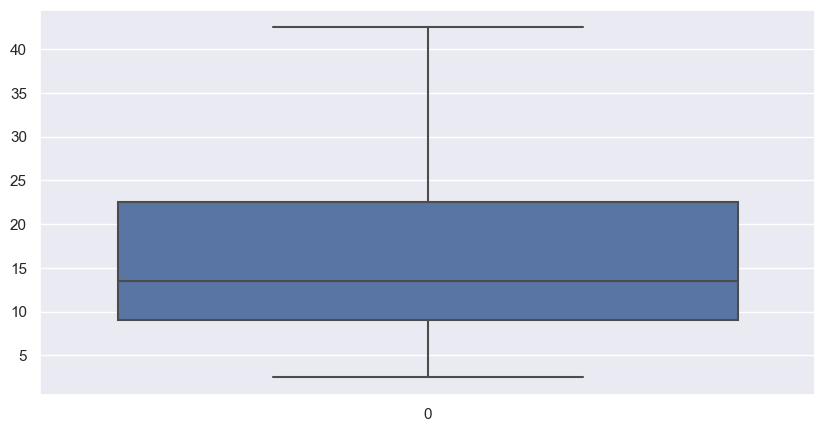

In [187]:
# Tampilkan boxplot
sns.boxplot(df_clean1["price"])

In [188]:
# Tampilkan outliernya
print('Data sebelum di hilangkan outliernya :', df_clean1.shape)
df_clean1 = df_clean1[~((df_clean1['price']>(Q3+(1.5*IQR))))]
print('Data sesudah dihilangkan outliernya :', df_clean1.shape)

Data sebelum di hilangkan outliernya : (576512, 11)
Data sesudah dihilangkan outliernya : (576512, 11)


In [189]:
# Membuat fungsi untuk visualisasi histogram dan boxplot dengan 2 parameter
def diagnostic_plots(df_clean1, variable):
    # Mengatur ukuran
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_clean1[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_clean1[variable])
    plt.title('Boxplot')

    plt.show()

In [190]:
select = df_clean1[['price']]
select.head()

,price
0,5.0
1,11.0
2,7.0
3,26.0
4,9.0


## 5.4- Handling Missing Value

In [194]:
# Missing Value di X_train
missing_values = np.isnan(X_train).sum(axis=0)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# Missing Value diX_test 
X_test.isna().sum()

hour                0
day                 0
name                0
distance            0
surge_multiplier    0
short_summary       0
dtype: int64

In [ ]:
# MV di y_train
y_train.isna().sum()

0

In [ ]:
# MV di y_test
y_test.isna().sum()

0

## 5.5- Feature Selection

In [ ]:
list(X_train.columns)

['hour', 'day', 'name', 'distance', 'surge_multiplier', 'short_summary']

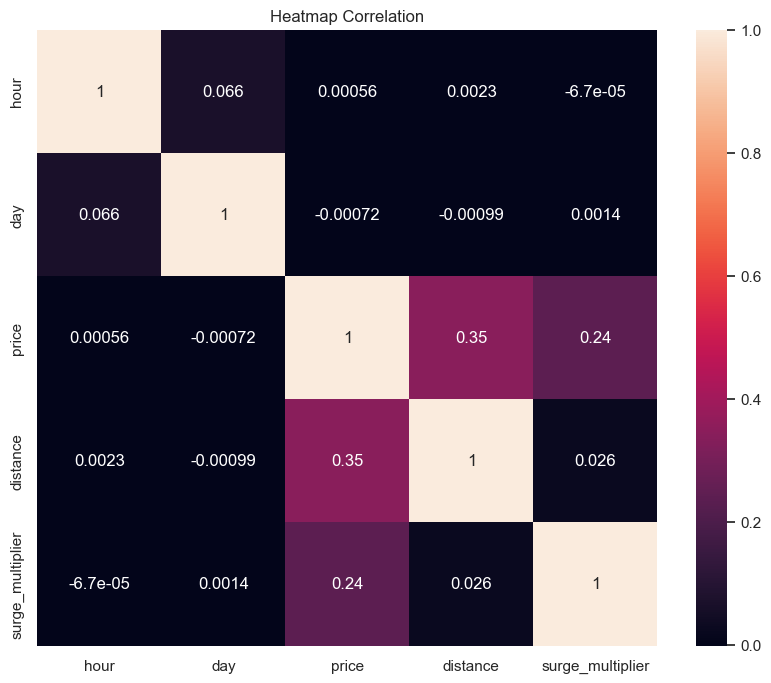

In [ ]:
# Create Heatmap viz
fig, ax = plt.subplots(figsize=[10, 8]) # Canvas size would be 10 x 8 inch
corr = df_clean1.corr(numeric_only=True)     # Checking correlation in dataframe 'data'
sns.heatmap(corr, annot=True)           # Plot would be HEATMAP
plt.title('Heatmap Correlation')        # It's title

# Show the plot
plt.show()

## 5.6- Split Numerical and Categorical column

In [ ]:
num_col = ['hour','day', 'distance'] # Numeric column
cat_col_o = ['surge_multiplier'] # categories ordinal column
cat_col_n = ['short_summary', 'name'] # categories nominal column

# Show what included in each list
print('Numeric columns: ', num_col)
print('Category columns ordinal: ', cat_col_o)
print('Category columns nominal: ', cat_col_n)

Numeric columns:  ['hour', 'day', 'distance']
Category columns ordinal:  ['surge_multiplier']
Category columns nominal:  ['short_summary', 'name']


In [ ]:
# Feature train-set (X_train)
X_train_num = X_train[num_col]
X_train_cat_n = X_train[cat_col_n]
X_train_cat_o = X_train[cat_col_o]

# Feature test-set (X_test)
X_test_num = X_test[num_col]
X_test_cat_o = X_test[cat_col_o]
X_test_cat_n = X_test[cat_col_n]

## 5.7- Feature Scaling

### 5.7.1- Standarisasi
Pada tahap ini berisi beberapa kondisi yang kami buat dengan tujuan untuk memaksimalkan hasil modelling nanti beserta tahapan-tahapan lainnya agar kondisi-kondisi tersebut semakin optimal. Diantaranya adalah mengindentifikasi data, menghandle outliers, dan menghitung nilai kuartil.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_num)

StandardScaler()

In [ ]:
# Membuat fungsi untuk visualisasi histogram dan boxplot dengan 2 parameter
def diagnostic_plots(df_clean1, variable):
    # Mengatur ukuran
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_clean1[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_clean1[variable])
    plt.title('Boxplot')

    plt.show()

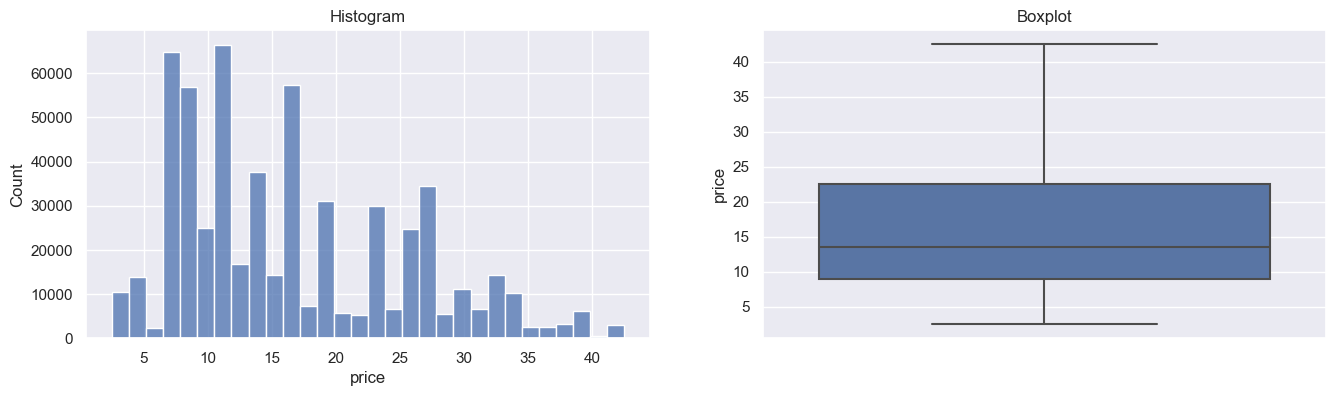

Skewness Value :  0.7341993033589327


In [ ]:
diagnostic_plots(select, 'price')
print('Skewness Value : ', select['price'].skew())

## 5.8- Feature Encoding

### 5.8.1- Numerikal


In [ ]:
p_values = []
interpretation = []
columns = []

for col in X_train_num.columns:
    corr_coef, p_value_corr = pearsonr(X_train_num[col], y_train)

    p_values.append(p_value_corr)
    columns.append(col)

    if p_value_corr < 0.5:
        interpretation.append("There is correlation")
    else:
        interpretation.append("There is no correlation")

pd.DataFrame({'Column Name': columns, 'P Value': p_values, 'Interpretation': interpretation})

,Column Name,P Value,Interpretation
0,hour,0.750164,There is no correlation
1,day,0.497656,There is correlation
2,distance,0.000000,There is correlation


### 5.8.2- Categorical


In [ ]:
print(X_train_cat_o['surge_multiplier'].unique())

[1.   1.25 1.75 1.5  2.   2.5  3.  ]


In [ ]:
encoder_o = OrdinalEncoder(categories=[[1.0, 1.25, 1.5, 1.75, 2.0, 2.5, 3.0]])
encoder_o.fit(X_train_cat_o)


OrdinalEncoder(categories=[[1.0, 1.25, 1.5, 1.75, 2.0, 2.5, 3.0]])

In [ ]:

encoder_n = OneHotEncoder()
encoder_n.fit(X_train_cat_n)

OneHotEncoder()

In [ ]:
X_train_cat_encoded_o = encoder_o.transform(X_train_cat_o)
X_test_cat_encoded_o = encoder_o.transform(X_test_cat_o)

X_train_cat_encoded_n = encoder_n.transform(X_train_cat_n)
X_test_cat_encoded_n = encoder_n.transform(X_test_cat_n)

### 5.8.3- Visualisasi Heatmap

In [ ]:
# Membuat objek LabelEncoder untuk melakukan encoding pada setiap kolom.
label_encoder = LabelEncoder()

# Mengambil tipe data object pada dataset dan di simpan di df_encode_cor1
df_category = df_cor.select_dtypes(include='object')
df_encode_cor = df_cor.copy()

for column in df_category.columns:
    df_encode_cor[column] = label_encoder.fit_transform(df_cor[column])

In [ ]:
# Membuat fungsi heat_map dengan 2 parameter
# nama df adalah nama datasetnya, list kolom adalah list korelasi yang ingin di cek
def heat_map(nama_df,list_kolom):
    df_heatmap = nama_df[list_kolom] #Memasukkan data kolom tersebut kedalam variabel baru
    plt.figure(figsize=(20,23)) #Mengatur ukuran

    #Membuat heat map dengan menampilkan nilai dari korelasi
    sns.heatmap(df_heatmap.corr(),
                annot=True,
                cmap='viridis',
                linewidths=.5,
                linecolor='black',
                square=True)

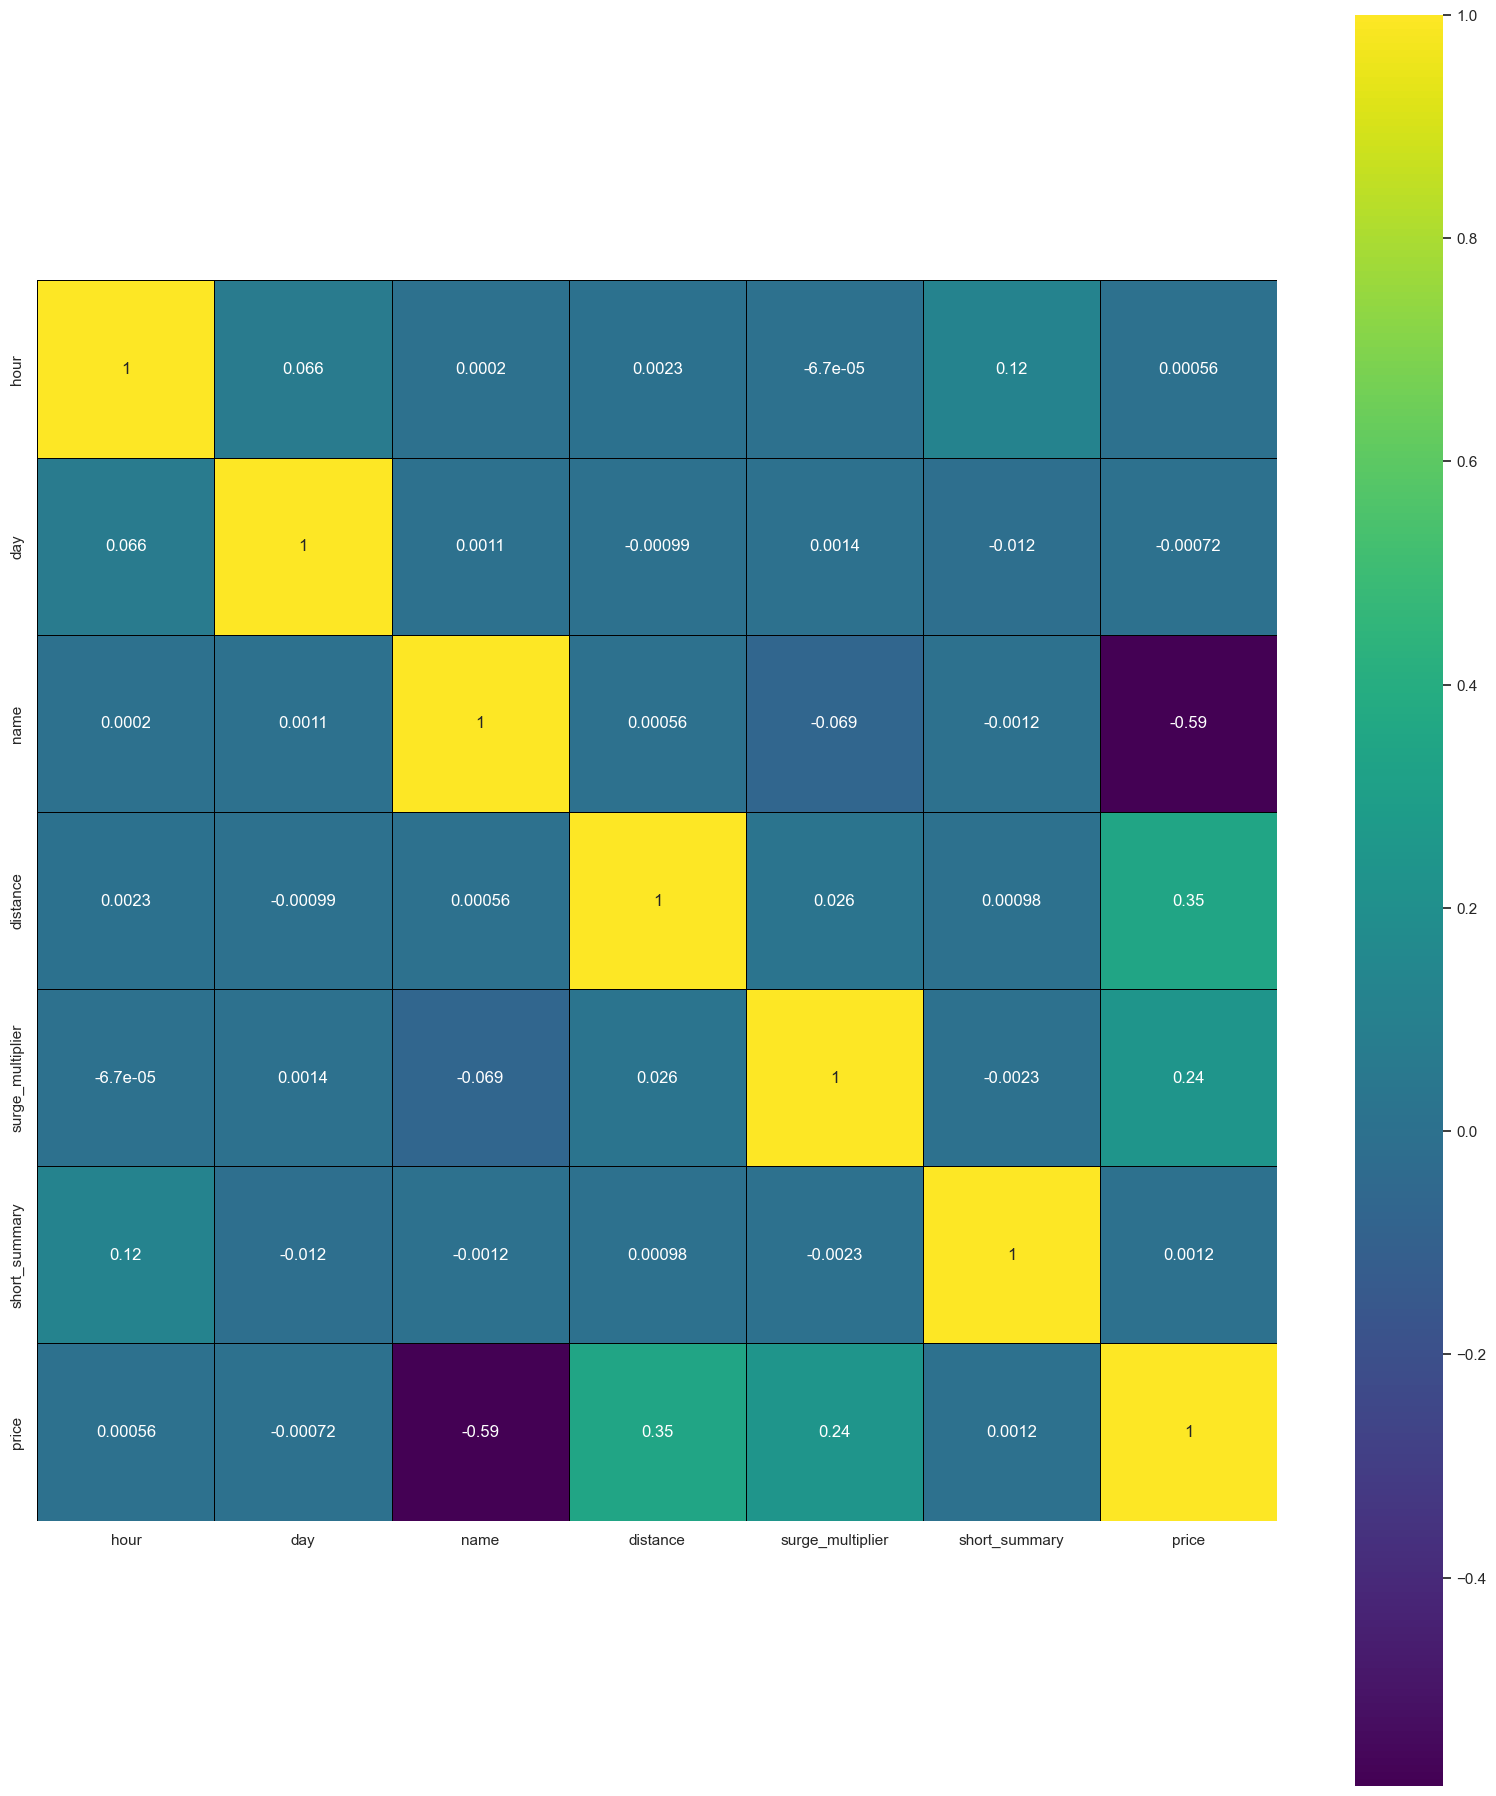

In [ ]:
heat_map_model = ['hour', 'day', 'name', 'distance', 'surge_multiplier','short_summary','price']
heat_map(df_encode_cor,heat_map_model)

**Kesimpulan :**
Berdasarkan heatmap, dipilih beberapa kolom yang memiliki korelasi cukup tinggi diantaranya adalah :

1. `hour`, dengan korelasi sebesar 0.00055
2. `day`, dengan korelasi sebesar -0,00072
3. `distance`, dengan korelasi sebesar 0.35
4. `short_summary`, dengan korelasi sebesar 0.0012
5. `name`, dengan korelasi sebesar -0.59
6. `surge_multiplier`, dengan korelasi sebesar 0.24
7. `price`, dengan korelasi sebesar 1

### 5.8.3- Skewness Check

In [ ]:
list_skew = []

for col in num_col:
    list_skew.append([col, X_train[col].skew()])

pd.DataFrame(columns=["Column Name", "Skewness"], data=list_skew)

,Column Name,Skewness
0,hour,-0.044244
1,day,-0.374379
2,month,-0.353342
3,distance,0.815421
4,surge_multiplier,7.941074


## 5.9- Merge (concat) data

In [ ]:
# Concat column atau gabung column
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded_o, X_train_cat_encoded_n], axis=1)
X_test_final = np.conca([X_test_num_scaled, X_test_cat_encoded_o, X_test_cat_encoded_n], axis=1)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 2 has 0 dimension(s)

# 6- Model Definition

> Bagian ini berisi cell untuk mendifinisikan model. Jelaskan alasan menggunakan algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Note:

1.   Model/Algoritma apa saja yang digunakan ? Alasan
2.   Metrics apa yang digunakan ? Alasan



## 6.1- Linear Regression

In [ ]:
lin_reg = LinearRegression()

In [ ]:
model = lin_reg.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

#Calculating r2_score
r2_scorevalue = r2_score(y_test, y_pred)
print('r2_score is : ', r2_scorevalue )

In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
print("Measuring on Training set.\n")
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_train, y_train_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_train, y_train_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

#Calculating r2_score
r2_scorevalue = r2_score(y_train, y_train_pred)
print('r2_score is : ', r2_scorevalue )

## 6.2- Lasso

In [ ]:
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0)
lasso_cv.fit(X_train, y_train)

In [ ]:
y_test_pred = lasso_cv.predict(X_test)

In [ ]:
print("Measuring on Testing set.\n")
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_test_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_test_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

#Calculating r2_score
r2_scorevalue = r2_score(y_test, y_test_pred)
print('r2_score is : ', r2_scorevalue )

In [ ]:
y_train_pred = lasso_cv.predict(X_train)

In [ ]:
print("Measuring on Training set\n")
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_train, y_train_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_train, y_train_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

#Calculating r2_score
r2_scorevalue = r2_score(y_train, y_train_pred)
print('r2_score is : ', r2_scorevalue )

## 6.3- Ridge

In [ ]:
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10])
ridge_cv.fit(X_train, y_train)

In [ ]:
y_pred = ridge_cv.predict(X_test)

In [ ]:
print("Measuring on Testing set.\n")
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

#Calculating r2_score
r2_scorevalue = r2_score(y_test, y_pred)
print('r2_score is : ', r2_scorevalue )

In [ ]:
y_train_pred = ridge_cv.predict(X_train)

In [ ]:
print("Measuring on Training set.\n")
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_train, y_train_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_train, y_train_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

#Calculating r2_score
r2_scorevalue = r2_score(y_train, y_train_pred)
print('r2_score is : ', r2_scorevalue )

# 7- Model Training

## 7.1- Linear Regression

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan

In [ ]:
model_lin.fit(X_train_final, y_train) # ini hanya dilakukan ditraining set

LinearRegression()

In [ ]:
model_kondisi = model_lin.fit(X_train, y_train)
y_pred = model_kondisi.predict(X_test)

# 8- Model Evaluation

## 8.1- Linear

- R squared, merupakan angka yang berkisar antara 0 sampai 1 yang mengindikasikan besarnya kombinasi variabel independen secara bersama – sama mempengaruhi nilai variabel dependen atau bisa disebut juga dengan akurasi (%).
- Mean Squared Error (MSE), adalah Rata-rata Kesalahan kuadrat antara nilai aktual dan nilai peramalan.
- Root Mean Square Error (RMSE), adalah jumlah dari kesalahan kuadrat atau selisih antara nilai sebenarnya dengan nilai prediksi yang telah ditentukan-

In [ ]:
mse1 = mean_squared_error(y_test, y_pred)
rmse1 = np.sqrt(mse1)
print('Nilai R-squared : ', r2_score(y_test, y_pred)*100)
print('Nilai MSE : ', mse1)
print('Nilai RMSE : ', rmse1)

## 8.2- Intercept & Slope

> pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilij. hal ini harus dibuktikan dengan vvisialisasi performa dan/atau tingkat kesalahan model. Lakukkan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [ ]:
y_pred_train = model_lin.predict(X_train_final)
y_pred_test = model_lin.predict(X_test_final)

In [ ]:
y_pred_train

array([85.02357826, 71.77249847, 78.67006561, ..., 67.53690068,
       66.80219734, 63.50806089])

In [ ]:
y_train

233      82
2996     73
849      78
17298    57
11864    64
         ..
1099     77
18898    52
11798    64
6637     68
2575     73
Name: Rating, Length: 15408, dtype: int64

In [ ]:
coef1 = model_kondisi.coef_
intercept = model_kondisi.intercept_
print("Nilai intercept :", model_kondisi.intercept_)
print("Nilai slope :", model_kondisi.coef_)

In [ ]:
print('Mean absolute error Train set', mean_absolute_error(y_pred_train, y_train))
print('Mean absolute error Test set', mean_absolute_error(y_pred_test, y_test))

Mean absolute error Train set 2.327314846868718
Mean absolute error Test set 2.3529020001207135


In [ ]:
print('Mean absolute error Train set', r2_score(y_pred_train, y_train)) # r2_score adalah perbandingan nilai train dan prediksi
print('Mean absolute error Test set', r2_score(y_pred_test, y_test))

Mean absolute error Train set 0.7673419862529439
Mean absolute error Test set 0.7739632906614717


Berarti error di train set 2.327 artinya jika aslinya rating adalah 80, maka kemungkinan model akan diprediksi lebih 2.327 atau kurang 2.327. Yang berarti range prediksi Rating sebenarnya 80 adalah 82.237 - 77.763. Sedangkan di Test set..........

Statement ?

1.   Jelaskan apakah model goodfit atau underfit atau overfit.
2.   **jelaskan dari segi bisnis impact jika model diterapkan.**
3.   Apa hal unik dari hasil model ini.
4.   (misal ada referensi) hasil ini sudah termasuk bagus atau belum.



**NOTES:**

*   Overfit itu jika hasil train bagus tetapi hasil test jelek (Mengingat)
*   Underfit itu jika hasil train dan test jelek (Tidak bagus)
*   Goodfit itu jika hasil train dan test bagus (Belajar)



In [ ]:
X_train['prediction'] = y_pred_train

In [ ]:
X_train['Rating'] = y_train

In [ ]:
X_train

,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,prediction,Rating
233,25,189,70,42000000,Medium,Medium,63,78,79,82,74,71,85.023578,82
2996,34,175,71,1000000,Medium,High,37,58,69,68,71,75,71.772498,73
849,30,177,79,13500000,Medium,Medium,76,69,74,80,70,70,78.670066,78
17298,23,169,67,300000,Medium,Medium,80,26,41,55,49,59,59.370345,57
11864,23,191,90,1100000,Medium,Medium,72,56,54,60,63,77,68.590455,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,24,191,87,21500000,High,Medium,72,79,64,71,45,76,75.044335,77
18898,17,178,77,200000,Medium,Medium,76,42,45,54,33,56,56.707044,52
11798,38,190,82,60000,Medium,Medium,60,61,59,64,37,67,67.536901,64
6637,19,180,74,2900000,High,Medium,66,63,63,70,54,63,66.802197,68


In [ ]:
condition = (y_test < 50) # kondisi untuk subset pertama
subset_x = y_test
subset_y = y_pred

subset1_x1 = y_test
subset1_y1 = y_pred

# Buat scatter plot untuk setiap subset dengan marker yang berbeda
plt.figure(figsize=(8,6))
sns.scatterplot(x=subset_x, y=subset_y, color='pink', alpha=0.5, marker='o')
sns.scatterplot(x=subset1_x1, y=subset1_y1, color='blue', alpha=0.5, marker='*')

# Menambahkan garis regresi untuk seluruh data
sns.regplot(x=y_test, y=y_pred, color='black', scatter=False, line_kws={'lw':2})

plt.title('Hasil Prediksi Model Linear Regression Kondisi 1', fontsize=16)
plt.xlabel('Harga Sebenarnya', fontsize=14)
plt.ylabel('Harga Diprediksi', fontsize=14)

# Menambahkan anotasi
plt.text(2, 39, f'R-squared = {round(r2_score(y_test, y_pred)*100, 2)}%', fontsize=12, color='grey')

plt.show()

# 9- Model Analysis

# 10- Model Inference

In [ ]:
# Import library


with open('model_lin.pkl', 'wb') as file_1: 
  pickle.dump(model_lin,file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler,file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  pickle.dump(encoder,file_3)

with open('model_encoder_n.pkl', 'wb') as file_4:
  pickle.dump(encoder_n,file_4)

with open('list_num_column.txt', 'wb') as file_5:
  pickle.dump(num_col, file_5)

with open('list_cat_col_o.txt', 'wb') as file_6:
  pickle.dump(cat_col_o, file_6)

with open('list_cat_col_n.txt', 'wb') as file_7:
  pickle.dump(cat_col_n, file_7)

# 11- Kesimpulan

> Pada bagian ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah dituliskan di bagian pengenalan.


1.   Narasi EDA
2.   Narasi Model Evaluation
3.   Narasi Model Analysis (keseluruhan model evaluation)
4.   Next Improvement nya gimana ?
5.   Hal lain ?



In [ ]:
df[:1].to_json()

'{"Name":{"0":"L. Messi"},"Age":{"0":34},"Height":{"0":170},"Weight":{"0":72},"Price":{"0":78000000},"AttackingWorkRate":{"0":"Medium"},"DefensiveWorkRate":{"0":"Low"},"PaceTotal":{"0":85},"ShootingTotal":{"0":92},"PassingTotal":{"0":91},"DribblingTotal":{"0":95},"DefendingTotal":{"0":34},"PhysicalityTotal":{"0":65},"Rating":{"0":93}}'

# 12- Conceptual Problems

Jawab pertanyaan berikut:

Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !

Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun !

